In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ncaab.csv")
df['WP'] = df['W']/df['G']
df.head()

,SEED,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,YEAR,WP
0,1.0,Kansas,B12,39,37,121.0,85.5,0.982,56.6,44.3,...,31.0,55.4,41.2,39.7,32.8,68.6,9.93,Champions,2008,0.948718
1,1.0,Memphis,CUSA,40,38,117.0,86.1,0.971,52.7,43.4,...,31.7,52.9,42.6,34.9,30.2,70.2,8.95,2ND,2008,0.950000
2,1.0,UCLA,P10,38,35,116.0,86.8,0.966,52.2,46.5,...,25.6,52.4,45.4,34.4,32.9,66.1,10.80,F4,2008,0.921053
3,1.0,North Carolina,ACC,39,36,122.0,91.9,0.965,53.0,48.2,...,25.7,52.1,47.8,37.2,32.6,74.7,11.90,F4,2008,0.923077
4,3.0,Wisconsin,B10,36,31,112.0,85.4,0.960,50.6,43.4,...,25.4,49.3,41.7,35.6,31.3,63.1,8.38,S16,2008,0.861111


# Can you predict how far a team will go in the postseason based on their regular season?

# EDA

Lets find the percentage of number 1 seeded teams that end up winning the tournament

In [3]:
seed = 1

print('Teams that were seeded number', seed,'going into the postseason that ended up winning the NCAA championship')
champs = df.loc[(df['SEED'] == seed) & (df['POSTSEASON'] == 'Champions')][['TEAM', 'YEAR']].sort_values(by='YEAR')
display(champs)

print('Percent of teams that were ranked number', seed,'that won the championship is', round(champs["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed ,'that made it to the final is', round(final["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 1)*100, '%')

final4 = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND') | (df['POSTSEASON'] == 'F4'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed, 'that made it to the final 4 is', round(final4["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 2)*100, '%')

Teams that were seeded number 1 going into the postseason that ended up winning the NCAA championship


,TEAM,YEAR
0,Kansas,2008
342,North Carolina,2009
684,Duke,2010
1374,Kentucky,2012
1718,Louisville,2013
2415,Duke,2015
3115,North Carolina,2017
3464,Villanova,2018
3815,Virginia,2019
4519,Baylor,2021


Percent of teams that were ranked number 1 that won the championship is 19.6 %
Percent of teams that were ranked number 1 that made it to the final is 30.0 %
Percent of teams that were ranked number 1 that made it to the final 4 is 39.0 %


In [4]:
seed = 2

print('Teams that were seeded number', seed,'going into the postseason that ended up winning the NCAA championship')
champs = df.loc[(df['SEED'] == seed) & (df['POSTSEASON'] == 'Champions')][['TEAM', 'YEAR']].sort_values(by='YEAR')
display(champs)

print('Percent of teams that were ranked number', seed,'that won the championship is', round(champs["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed ,'that made it to the final is', round(final["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final4 = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND') | (df['POSTSEASON'] == 'F4'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed, 'that made it to the final 4 is', round(final4["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

Teams that were seeded number 2 going into the postseason that ended up winning the NCAA championship


,TEAM,YEAR
2764,Villanova,2016


Percent of teams that were ranked number 2 that won the championship is 1.7999999999999998 %
Percent of teams that were ranked number 2 that made it to the final is 5.4 %
Percent of teams that were ranked number 2 that made it to the final 4 is 19.6 %


In [5]:
seed = 3

print('Teams that were seeded number', seed,'going into the postseason that ended up winning the NCAA championship')
champs = df.loc[(df['SEED'] == seed) & (df['POSTSEASON'] == 'Champions')][['TEAM', 'YEAR']].sort_values(by='YEAR')
display(champs)

print('Percent of teams that were ranked number', seed,'that won the championship is', round(champs["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed ,'that made it to the final is', round(final["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final4 = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND') | (df['POSTSEASON'] == 'F4'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed, 'that made it to the final 4 is', round(final4["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

Teams that were seeded number 3 going into the postseason that ended up winning the NCAA championship


,TEAM,YEAR
1042,Connecticut,2011


Percent of teams that were ranked number 3 that won the championship is 1.7999999999999998 %
Percent of teams that were ranked number 3 that made it to the final is 5.4 %
Percent of teams that were ranked number 3 that made it to the final 4 is 8.9 %


In [6]:
seed = 4

print('Teams that were seeded number', seed,'going into the postseason that ended up winning the NCAA championship')
champs = df.loc[(df['SEED'] == seed) & (df['POSTSEASON'] == 'Champions')][['TEAM', 'YEAR']].sort_values(by='YEAR')
display(champs)

print('Percent of teams that were ranked number', seed,'that won the championship is', round(champs["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed ,'that made it to the final is', round(final["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

final4 = df.loc[(df['SEED'] == seed) & ((df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND') | (df['POSTSEASON'] == 'F4'))][['TEAM', 'YEAR', 'POSTSEASON']].sort_values(by='YEAR')
print('Percent of teams that were ranked number', seed, 'that made it to the final 4 is', round(final4["TEAM"].count()/df.loc[(df['SEED'] == seed)]['TEAM'].count(), 3)*100, '%')

Teams that were seeded number 4 going into the postseason that ended up winning the NCAA championship


,TEAM,YEAR


Percent of teams that were ranked number 4 that won the championship is 0.0 %
Percent of teams that were ranked number 4 that made it to the final is 1.7999999999999998 %
Percent of teams that were ranked number 4 that made it to the final 4 is 7.1 %


In [7]:
df['POSTSEASON'] = df['POSTSEASON'].fillna('NT') #'NT' means not in the tournament
df['SEED'] = df['SEED'].fillna('None')

Lets look at win percentage in the season and see how it effects the postseason performance

In [8]:
df['WP'] = df['W']/df['G']
df[['WP','POSTSEASON']].groupby('POSTSEASON').mean().sort_values(by = 'WP', ascending = False)

,WP
POSTSEASON,
Champions,0.881720
2ND,0.837555
F4,0.800714
E8,0.790041
S16,0.756275
R32,0.729144
R64,0.693218
R68,0.619213
NT,0.463854


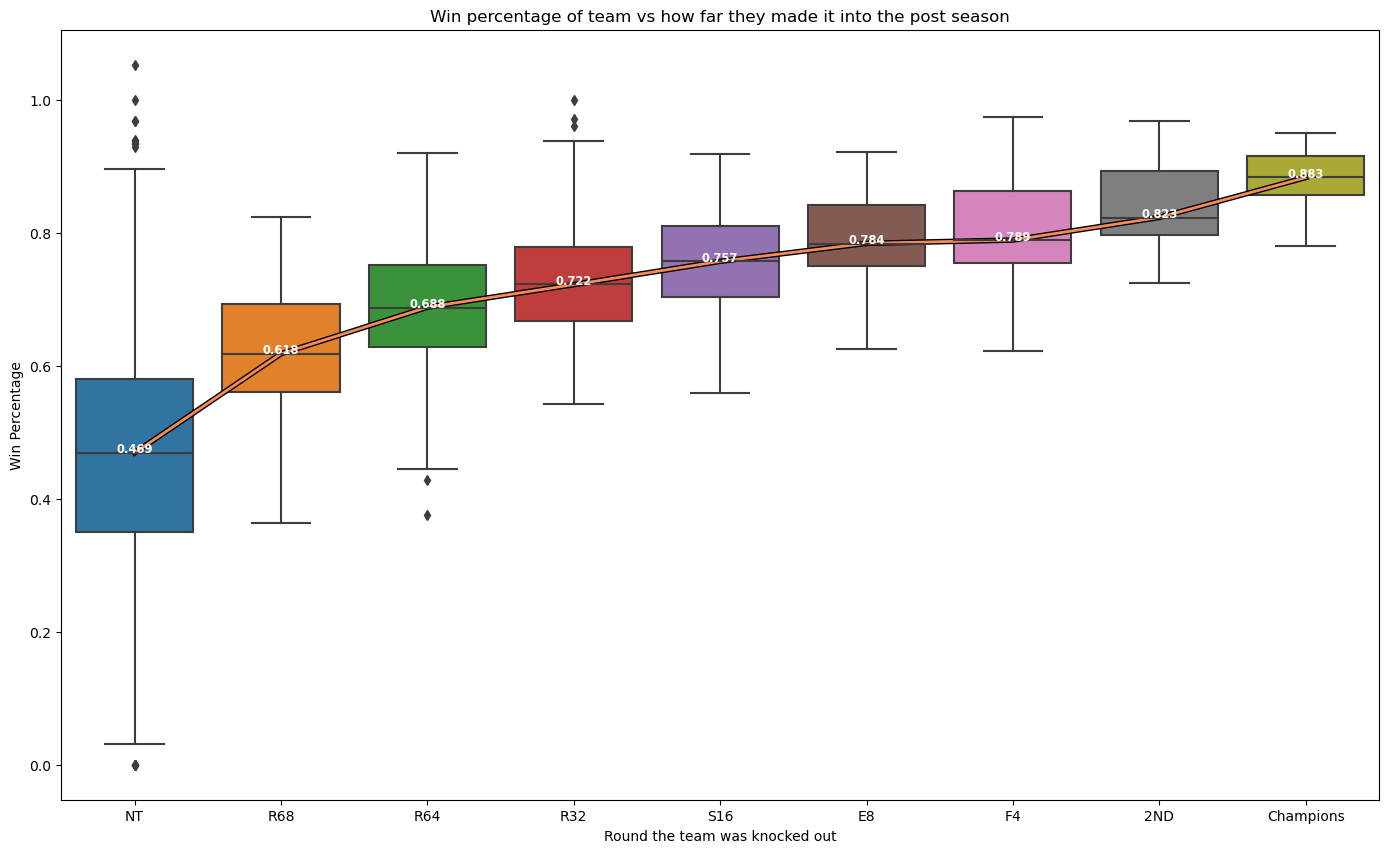

In [9]:
plt.figure(figsize = (17,10))
box_plot = sns.boxplot(x = df['POSTSEASON'], y = df['WP'], order = ['NT', 'R68', 'R64', 'R32', 'S16','E8', 'F4', '2ND', 'Champions'])
plt.ylabel('Win Percentage')
plt.xlabel('Round the team was knocked out')
plt.title('Win percentage of team vs how far they made it into the post season')
medians = round(df[['WP','POSTSEASON']].groupby('POSTSEASON').median().sort_values(by = 'WP', ascending = True)['WP'],3)
vertical_offset = df['WP'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick],medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')

medians = round(df[['WP','POSTSEASON']].groupby('POSTSEASON').median().sort_values(by = 'WP', ascending = True),3)
sns.lineplot(x = medians.index, y = medians['WP'], color = '#000000', linewidth = 4)
sns.lineplot(x = medians.index, y = medians['WP'], color = '#f98a59', linewidth = 2)
plt.show()

We can see that on average a team with a higher winning percentage during the season will go farther in the tournament and the spread also decreases as the tournament goes on. The round of 68 is a little weird because those are play in games so teams with a higher winning percentage will not get represented. Lets see now the lowest seed in each round and the highest seed that got knocked out each round

In [10]:
display(df[['SEED', 'POSTSEASON']].groupby('POSTSEASON').max().reindex(['R64', 'R32', 'S16', 'E8', 'F4', '2ND','Champions']))
display(df[['SEED', 'POSTSEASON']].groupby(['POSTSEASON']).min().reindex(['R64', 'R32', 'S16', 'E8', 'F4', '2ND','Champions']))

,SEED
POSTSEASON,
R64,16.0
R32,16.0
S16,15.0
E8,15.0
F4,11.0
2ND,8.0
Champions,7.0


,SEED
POSTSEASON,
R64,1.0
R32,1.0
S16,1.0
E8,1.0
F4,1.0
2ND,1.0
Champions,1.0


Interesting. So in the last 10 or so years in every round there has been at least 1 team seeded first that has been eliminated. 

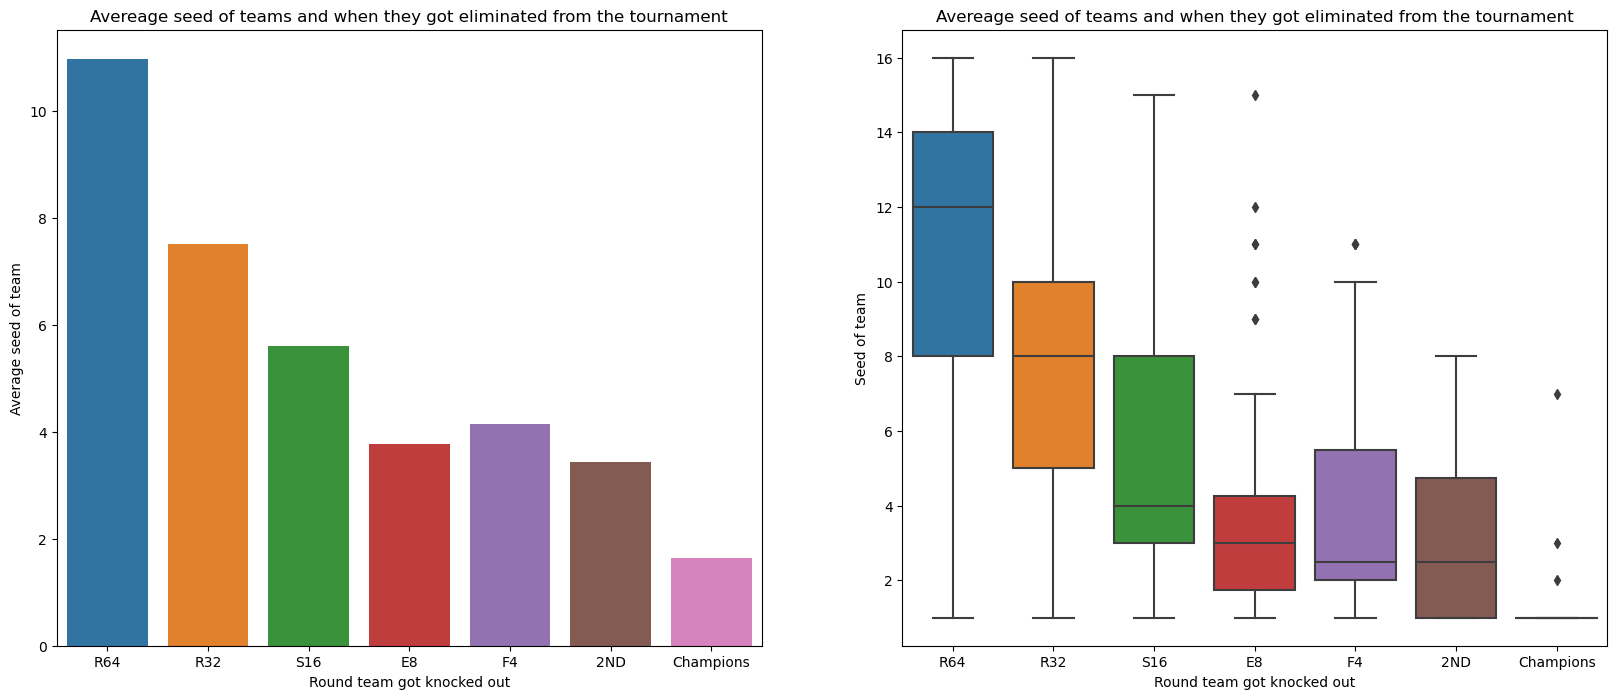

In [11]:
df_wo_NTteams = df.loc[(df['POSTSEASON'] != 'NT') & (df['POSTSEASON'] != 'R68')]
avg_seed = df_wo_NTteams[['SEED', 'POSTSEASON']].groupby('POSTSEASON').mean().reindex(['R64', 'R32', 'S16', 'E8', 'F4', '2ND','Champions'])

fig, [ax, ax2] = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x = avg_seed.index, y = avg_seed['SEED'], ax = ax)
ax.set_xlabel('Round team got knocked out')
ax.set_ylabel('Average seed of team')
ax.set_title('Avereage seed of teams and when they got eliminated from the tournament')

sns.boxplot(y = df_wo_NTteams['SEED'], x = df_wo_NTteams['POSTSEASON'], ax = ax2, order = ['R64', 'R32', 'S16','E8', 'F4', '2ND', 'Champions'])
ax2.set_xlabel('Round team got knocked out')
ax2.set_ylabel('Seed of team')
ax2.set_title('Avereage seed of teams and when they got eliminated from the tournament')
plt.show()

From these graphs vs the one above for win percentage, win percentage looks like a better estimator for how far they make it in the tournament. It is also interesting that in the final 4 there is a bigger spread than the elite 8

# Which conference produces the most champions?

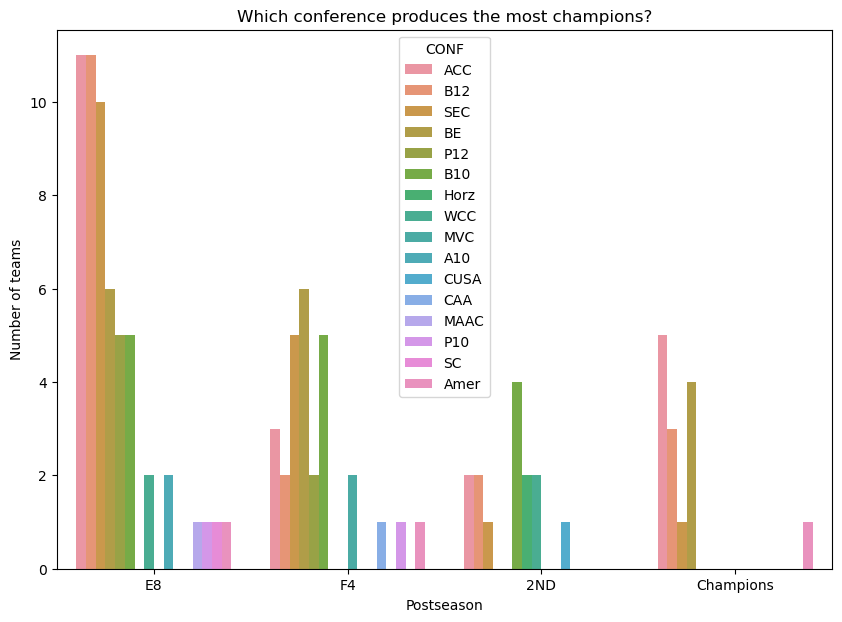

In [12]:
d = pd.DataFrame(df[['CONF', 'POSTSEASON']].loc[(df['POSTSEASON'] == 'Champions') | (df['POSTSEASON'] == '2ND') | (df['POSTSEASON'] == 'F4') | (df['POSTSEASON'] == 'E8')].value_counts()).reset_index()
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(x='POSTSEASON', y=0, hue='CONF', data=d, order=['E8', 'F4', '2ND', 'Champions'])
ax.set_ylabel('Number of teams')
ax.set_xlabel('Postseason')
ax.set_title('Which conference produces the most champions?')
plt.show()

#### The only conference that has had teams that have been knocked out in each of the rounds at and after elite 8 is the ACC. The champions have come from only the ACC, BE, and Amer conferences, with Amer only being represented once


# Upsets
#### One of the biggest questions in the tournament is when and who will be involved in an upset. In the first round of 64, there are 32 games which means there is a possible 32 upsets. The greater the spread in seed, the more shocking it is when there is an upset. 

We will look at seeds 1-8 who lost in the 1st round (upset)

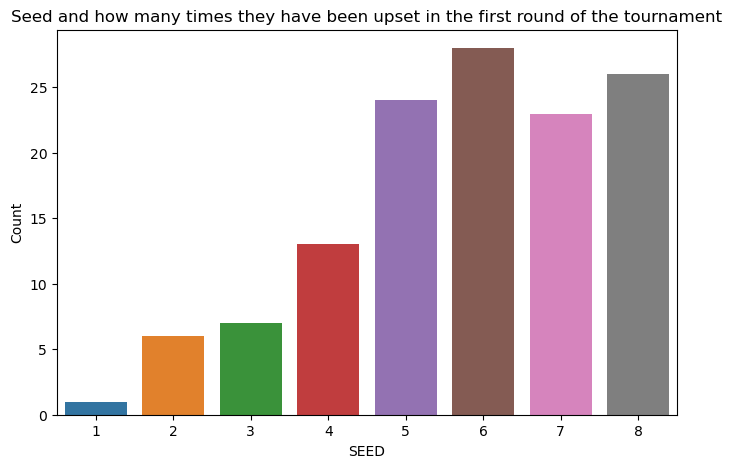

In [13]:
temp_df = df[df.SEED != 'None']
temp_df['SEED'] = temp_df['SEED'].astype('int')
temp_df = temp_df.loc[(temp_df['POSTSEASON'] == 'R64') & (temp_df['SEED'] <= 8)]
seed_upset_df = pd.DataFrame(temp_df['SEED'].value_counts()).reset_index().rename(columns = {'index' : 'SEED', 'SEED': 'Count'}).sort_values(by = 'SEED', ascending = True)
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x = seed_upset_df['SEED'], y = seed_upset_df['Count'], ax = ax)
ax.set_title('Seed and how many times they have been upset in the first round of the tournament')
plt.show()

#  Lets model a tournament and see how it does
### 2016 had a lot of upsets 

#### The March Madness tournament is basically 4 single elimination tournaments put into one, with the winners of each going into another single elimination tournament (semis). So we will model one single elimination tournament and use it for all 4 for the 2016 tournament

In [14]:
df = pd.read_csv('ncaab2.csv')
df = pd.get_dummies(df, columns = ["CONF"])
df['SEED'] = df['SEED'].fillna('None')
df['POSTSEASON'] = df['POSTSEASON'].fillna('NT')
df['WP'] = df['W']/df['G']
index_NT = df[df['POSTSEASON'] == 'NT'].index
df.drop(index_NT, inplace = True)
df["SEED"].replace({'None':19}, inplace = True)
df['POSTSEASON'].replace({'Champions' : 1, '2ND':2, 'F4':3, 'E8':4, 'S16':5, 'R32':6, 'R64':7, 'R68':8, 'NT':9}, inplace = True)

In [15]:
dftest = pd.read_csv('ncaab.csv')
dftest = pd.get_dummies(dftest, columns = ["CONF"])
dftest['SEED'] = dftest['SEED'].fillna('None')
dftest['POSTSEASON'] = dftest['POSTSEASON'].fillna('NT')
dftest['WP'] = dftest['W']/df['G']
index_NT = dftest[dftest['POSTSEASON'] == 'NT'].index
dftest.drop(index_NT, inplace = True)
dftest["SEED"].replace({'None':19}, inplace = True)
dftest['POSTSEASON'].replace({'Champions' : 1, '2ND':2, 'F4':3, 'E8':4, 'S16':5, 'R32':6, 'R64':7, 'R68':8, 'NT':9}, inplace = True)


X = dftest.drop(["POSTSEASON", "YEAR", "TEAM",], axis = 1)
y = dftest["POSTSEASON"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

I will test a couple of models here to see which one does the best

In [16]:
models = [RandomForestClassifier(), RandomForestRegressor(), LinearRegression()]
for i in range(len(models)):
    model_i = models[i]
    model_i.fit(X_train, y_train)
    Y_pred_i = model_i.predict(X_test)
    print("Y_pred_", i, "score = ", model_i.score(X_test, y_test))
    print(1 - (1-model_i.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Y_pred_ 0 score =  0.5296610169491526
0.8747092762010893
Y_pred_ 1 score =  0.6616542177139173
0.8814344967983481
Y_pred_ 2 score =  0.5483815965024391
0.5917293933833976


RandomForestRegressor performed the best. Even though technically the round the team was knocked out in is discrete we will look at is as continuous so it produces better estimates

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("score = ", model.score(X_test, y_test))

score =  0.6625456879709741


In [18]:
importances = model.feature_importances_
features = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame based on the feature importances
features = features.sort_values(by='importance', ascending=False)

features.to_csv('feature_importance_revenue.csv')

# Print the top 5 features and their importances
print("Top 5 features:")
for i, row in features[:10].iterrows():
    print("- Feature", row['feature'], ":", row['importance'])

Top 5 features:
- Feature G : 0.6172673848752628
- Feature BARTHAG : 0.13560521169952441
- Feature WAB : 0.022598640229562636
- Feature 3P_D : 0.017359859773431553
- Feature FTRD : 0.014589488053497454
- Feature WP : 0.014444998044008181
- Feature ADJDE : 0.013891105285447599
- Feature FTR : 0.01314076766448173
- Feature 2P_D : 0.012103701756581937
- Feature ADJ_T : 0.011986024431650404


In [19]:
def quarter_tournament(year, team_list):
    X = df[df['YEAR'] == year].drop(["POSTSEASON", "YEAR", "TEAM"], axis = 1)
    Y_pred = model.predict(X)
    
    
    df16 = df[df['YEAR'] == year]
    df16['pred'] = Y_pred
    df16.dropna(subset = ['POSTSEASON'], inplace = True)
    team_df = df16[df16['POSTSEASON'] != 'R68'].reset_index(drop = True)
    df16['PredPostSeason'] = np.nan
    
    teams_df = pd.DataFrame(columns = team_df.columns)

    for team in team_list:
        teams_df = teams_df.append(team_df.loc[team_df['TEAM']==team])
    
    teams = teams_df
    
    
    #round of 32 is the next round
    r32 = pd.DataFrame(columns = teams.columns)
    s16 = pd.DataFrame(columns = teams.columns)
    e8 = pd.DataFrame(columns = teams.columns)

    #final four is the champ of each individual division
    f4 = pd.DataFrame(columns = teams.columns)
    



    print("ROUND OF 64")
    # round of 64
    #for each team in the bracket (seed 1 - 16)
    for i in range(1, 9):
        team1 = teams.loc[teams['SEED'] == i][['TEAM']].iloc[0,0]
        team2 = teams.loc[teams['SEED'] == 17-i][['TEAM']].iloc[0,0]
        print(team1, 'vs', team2)


        WP1 = teams.loc[teams['SEED'] == i][['pred']].iloc[0,0]
        WP2 = teams.loc[teams['SEED'] == 17-i][['pred']].iloc[0,0]
        if(WP1 < WP2):
            winner = team1
            loser = team2
        else:
            winner = team2
            loser = team1

        #df16.loc[df16['TEAM'] == loser, 'PredPostSeason'] = 'R64'
        print("Winner:", winner)
        r32 = r32.append(teams.loc[teams['TEAM'] == winner])




    print("\nROUND OF 32")
    # round of 32

    #for the teams in the tournament still
    for i in range(1,5):
        team = r32.loc[(r32['SEED'] == i) | \
                       (r32['SEED'] == 17 - i)]

        team2 = r32.loc[(r32['SEED'] == 9 - i) | \
                      (r32['SEED'] == 8 + i)]

        winner = ' '

        #if the te
        if not team.empty:
            matchup = team.append(team2)
        if team.empty:
            matchup = matchup.append(team2)

        if len(matchup) == 2:
            print(matchup.iloc[0,]['TEAM'], 'vs', matchup.iloc[1,]['TEAM'])

            WP1 = matchup.iloc[0,]['pred']
            WP2 = matchup.iloc[1,]['pred']

            if(WP1 < WP2):
                winner = matchup.iloc[0,]['TEAM']
            else:
                winner = matchup.iloc[1,]['TEAM']

            matchup = pd.DataFrame(columns = teams.columns)

        print("Winner:", winner)
        s16 = s16.append(teams.loc[teams['TEAM'] == winner])




    print("\nELITE 8")
    # elite 8


    team = s16.loc[((s16['SEED'] == 1) | (s16['SEED'] == 16)) | \
                      ((s16['SEED'] == 8) | (s16['SEED'] == 9))]
    team2 = s16.loc[((s16['SEED'] == 5) | (s16['SEED'] == 12)) | \
                      ((s16['SEED'] == 4) | (s16['SEED'] == 13))]

    team3 = s16.loc[((s16['SEED'] == 6) | (s16['SEED'] == 11)) | \
                      ((s16['SEED'] == 3) | (s16['SEED'] == 14))]

    team4 = s16.loc[((s16['SEED'] == 7) | (s16['SEED'] == 10)) | \
                    ((s16['SEED'] == 2) | (s16['SEED'] == 15))]


    winner = ' '

    ts = [team, team2, team3, team4]

    for team in ts:
        matchup = matchup.append(team)

        if(len(matchup) == 2):
            print(matchup.iloc[0,]['TEAM'], 'vs', matchup.iloc[1,]['TEAM'])

            WP1 = matchup.iloc[0,]['pred']
            WP2 = matchup.iloc[1,]['pred']

            if(WP1 < WP2):
                winner = matchup.iloc[0,]['TEAM']
            else:
                winner = matchup.iloc[1,]['TEAM']

            matchup = pd.DataFrame(columns = teams.columns)
            print("Winner:", winner)
            e8 = e8.append(teams.loc[teams['TEAM'] == winner])




    team = e8.loc[(e8['SEED'] == 1) | (e8['SEED'] == 16) |\
                 (e8['SEED'] == 8) | (e8['SEED'] == 9) |\
                 (e8['SEED'] == 5) | (e8['SEED'] == 12)|\
                 (e8['SEED'] == 4) | (e8['SEED'] == 13)]
    team2 = e8.loc[(e8['SEED'] == 6) | (e8['SEED'] == 11) |\
                 (e8['SEED'] == 3) | (e8['SEED'] == 14) |\
                 (e8['SEED'] == 7) | (e8['SEED'] == 10)|\
                 (e8['SEED'] == 2) | (e8['SEED'] == 15)]


    WP1 = team.iloc[0,]['pred']
    WP2 = team2.iloc[0,]['pred']


    if(WP1 < WP2):
        winner = team.iloc[0,]['TEAM']
    else:
        winner = team2.iloc[0,]['TEAM']


    f4 = f4.append(teams.loc[teams['TEAM'] == winner])
    return f4

In [20]:
def tournament(year, south, west, east, midwest):
    f4_south = quarter_tournament(year, south)
    f4_west = quarter_tournament(year, west)
    f4_east = quarter_tournament(year, east)
    f4_midwest = quarter_tournament(year, midwest)
    
    f4 = pd.concat([f4_south, f4_west, f4_east, f4_midwest], axis = 0)
    
    matchup1 = pd.concat([f4_midwest, f4_west], axis = 0)
    matchup2 = pd.concat([f4_south, f4_east], axis = 0)
    
    print("\nFINAL 4")
    
    print(matchup1.iloc[0]['TEAM'], 'vs', matchup1.iloc[1]['TEAM'])
    WP1 = matchup1.iloc[0,]['pred']
    WP2 = matchup1.iloc[1,]['pred']
    
    if(WP1 < WP2):
        winner1 = matchup1.iloc[0,]['TEAM']
    else:
        winner1 = matchup1.iloc[1,]['TEAM']
        
    print("Winner: ", winner1)
    
    
    
    print(matchup2.iloc[0]['TEAM'], 'vs', matchup2.iloc[1]['TEAM'])
    WP1 = matchup2.iloc[0,]['pred']
    WP2 = matchup2.iloc[1,]['pred']
    
    if(WP1 < WP2):
        winner2 = matchup2.iloc[0,]['TEAM']
    else:
        winner2 = matchup2.iloc[1,]['TEAM']
        
    print("Winner: ", winner2)
    
    champ = pd.DataFrame(columns = f4.columns)
    
    champ = pd.concat([f4.loc[f4['TEAM'] == winner1], f4.loc[f4['TEAM'] == winner2]])
    
    WP1 = champ.iloc[0,]['pred']
    WP2 = champ.iloc[0,]['pred']
    
    if(WP1 < WP2):
        winner = champ.iloc[0,]['TEAM']
    else:
        winner = champ.iloc[1,]['TEAM']
        
        
    print('\nCHAMPIONSHIP')
    print(champ.iloc[0,]["TEAM"], ' vs ',champ.iloc[1,]["TEAM"])
        
    print("Champion: ", winner)


In [21]:
team_list_south = ['Alabama', 'Texas A&M Corpus Chris', 'Maryland', 'West Virginia', 'San Diego St.',\
                  'College of Charleston', 'Virginia', 'Furman', 'Creighton', 'North Carolina St.', 'Baylor', \
                  'UC Santa Barbara', 'Missouri', 'Utah St.', 'Arizona', 'Princeton']

team_list_east = ['Purdue', 'Texas Southern', 'Memphis', 'Florida Atlantic', 'Duke', 'Oral Roberts', 'Tennessee',\
                 'Louisiana Lafayette', 'Kentucky', 'Providence', 'Kansas St.', 'Montana St.', 'Michigan St.', 'USC', \
                 'Marquette', 'Vermont']

team_list_midwest = ['Houston', 'Northern Kentucky', 'Iowa', 'Auburn', 'Miami FL', 'Drake', 'Indiana',\
                    'Kent St.', 'Iowa St.', 'Mississippi St.', 'Xavier', 'Kennesaw St.', 'Texas A&M', 'Penn St.', \
                    'Texas', 'Colgate']

team_list_west = ['Kansas', 'Howard', 'Arkansas', 'Illinois', "Saint Mary's", 'VCU', 'Connecticut', 'Iona', \
                 'TCU', 'Arizona St.', 'Gonzaga', 'Grand Canyon', 'Northwestern', 'Boise St.',\
                 'UCLA', 'UNC Asheville']

tournament(2023, west = team_list_west, south = team_list_south, east = team_list_east, midwest = team_list_midwest)

ROUND OF 64
Alabama vs Texas A&M Corpus Chris
Winner: Alabama
Arizona vs Princeton
Winner: Arizona
Baylor vs UC Santa Barbara
Winner: Baylor
Virginia vs Furman
Winner: Virginia
San Diego St. vs College of Charleston
Winner: San Diego St.
Creighton vs North Carolina St.
Winner: Creighton
Missouri vs Utah St.
Winner: Missouri
Maryland vs West Virginia
Winner: Maryland

ROUND OF 32
Alabama vs Maryland
Winner: Alabama
Arizona vs Missouri
Winner: Arizona
Baylor vs Creighton
Winner: Creighton
Virginia vs San Diego St.
Winner: San Diego St.

ELITE 8
Alabama vs San Diego St.
Winner: Alabama
Creighton vs Arizona
Winner: Arizona
ROUND OF 64
Kansas vs Howard
Winner: Kansas
UCLA vs UNC Asheville
Winner: UCLA
Gonzaga vs Grand Canyon
Winner: Gonzaga
Connecticut vs Iona
Winner: Connecticut
Saint Mary's vs VCU
Winner: Saint Mary's
TCU vs Arizona St.
Winner: TCU
Northwestern vs Boise St.
Winner: Boise St.
Arkansas vs Illinois
Winner: Arkansas

ROUND OF 32
Kansas vs Arkansas
Winner: Kansas
UCLA vs Boise